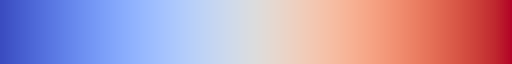

In [7]:
from datetime import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data_dir = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/bikes'

months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasons = {
        'Winter': [12, 1, 2],
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Autumn': [9, 10, 11]
    }

# set Seaborn style
sns.set_style("whitegrid")
sns.color_palette("coolwarm", as_cmap=True)

In [8]:
def get_date_format(city, year, month):
    year = int(year)
    if city == 'Austin':
        return '%m/%d/%Y %I:%M:%S %p'
    elif city == 'Boston':
        if (year == 2018 and month < 3) or (year == 2023 and month > 2):
            return '%Y-%m-%d %H:%M:%S'
        else:
            return '%Y-%m-%d %H:%M:%S.%f'
    elif city == 'Chicago' or city == 'Columbus' or city == 'Washington':
        return '%Y-%m-%d %H:%M:%S'
    elif city == 'NYC':
        if year <= 2020 or (year == 2021 and month == 0):
            return '%Y-%m-%d %H:%M:%S.%f'
        return '%Y-%m-%d %H:%M:%S'
    elif city == 'Philly':
        if year == 2018 or (year == 2019 and month >= 0 and month <= 5) or (year == 2019 and month >= 9):
            return '%Y-%m-%d %H:%M:%S'
        return '%m/%d/%Y %H:%M'
    elif city == 'SanFrancisco':
        if year < 2020 or (year == 2020 and month < 4):
            return '%Y-%m-%d %H:%M:%S.%f'
        return '%Y-%m-%d %H:%M:%S'

def get_season(month):

    for season, months in seasons.items():
        if month in months:
            return season
    return None

In [23]:
def compare_trip_for_month(path, city):
    '''
    function to plot the number of trips for every month of a specific year
    '''

    years = {
        '2018': [0] * 12,
        '2019': [0] * 12,
        '2020': [0] * 12,
        '2021': [0] * 12,
        '2022': [0] * 12,
        '2023': [0] * 12
    }
    
    for year in os.listdir(path):

        year_path = os.path.join(path, year)

        for file in os.listdir(year_path):
            full_path = os.path.join(year_path, file)
            df = pd.read_csv(full_path, dtype=object)

            month = int(file[4:6]) - 1
            years[year][month] = len(df.index)
    
    # plot the number of trips for every month for each year
    for year, months in years.items():
        sns.lineplot(x=months_list, y=months, label=year, marker='o')
    
    plt.yticks(np.arange(0, max([max(year) for year in years.values()]) + 1, step=30000), [f'{int(x/1000)}k' for x in np.arange(0, max([max(year) for year in years.values()]) + 1, step=30000)])
    plt.xlabel('Months')
    plt.ylabel('Trips')
    title = 'Number of Trips for every month of ' + city
    plt.title(title)
    plt.show()
    
    return months

In [10]:
def compare_trip_for_hour(year_path, city, year):
    '''
    function to plot the number of trips for every hour of a specific year, month and city
    
    Inputs:
        - df: the dataframe to analyse
        - full_path: the path of the file
        - month_to_check: the month to check
    '''
    
    seasons_result = {
        'Winter': [0] * 24,
        'Spring': [0] * 24,
        'Summer': [0] * 24,
        'Autumn': [0] * 24
    }
    
    print(year_path)
    for file in os.listdir(year_path):
        print(f'Processing file: {file}')
        full_path = os.path.join(year_path, file)
        df = pd.read_csv(full_path, dtype=object)
        
        for index in range(len(df.index)):
            date_format = get_date_format(city, year, file)
            if city == 'SanFrancisco':
                if len(df['stop_time'][index]) == 24:
                    hour = datetime.strptime(df['stop_time'][index], date_format).hour
                else:
                    hour = datetime.strptime(df['stop_time'][index], '%Y-%m-%d %H:%M:%S').hour
            else:
                hour = datetime.strptime(df['stop_time'][index], date_format).hour
            
            # get the correct season
            month = int(file[4:6])
            month = month if month > 9 else int(file[5])
            season = get_season(month)
            
            seasons_result[season][hour] += 1
        
    # plot a line plot with seaborn
    for season, hours in seasons_result.items():
        sns.lineplot(x=list(range(24)), y=hours, marker='o', label=season)
        # calculate mean
        mean_hours = np.mean(hours)
        print(f'Mean number of trips in {season}: {mean_hours}')
    
    plt.legend()
    plt.yticks(np.arange(0, max([max(hours) for hours in seasons_result.values()]) + 1, step=10000), [f'{int(x/1000)}k' for x in np.arange(0, max([max(hours) for hours in seasons_result.values()]) + 1, step=10000)])
    plt.xlabel('Hours')
    plt.ylabel('Trips')
    title = 'Number of Trips for every hour of ' + city + ' in ' + year
    plt.title(title)        
    plt.show()

/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/bikes/Boston/2022
Processing file: 202211-bluebikes-tripdata.csv
Processing file: 202212-bluebikes-tripdata.csv
Processing file: 202210-bluebikes-tripdata.csv
Processing file: 202208-bluebikes-tripdata.csv
Processing file: 202202-bluebikes-tripdata.csv
Processing file: 202205-bluebikes-tripdata.csv
Processing file: 202206-bluebikes-tripdata.csv
Processing file: 202201-bluebikes-tripdata.csv
Processing file: 202207-bluebikes-tripdata.csv
Processing file: 202204-bluebikes-tripdata.csv
Processing file: 202203-bluebikes-tripdata.csv
Processing file: 202209-bluebikes-tripdata.csv
Mean number of trips in Winter: 13957.708333333334
Mean number of trips in Spring: 33639.375
Mean number of trips in Summer: 50772.833333333336
Mean number of trips in Autumn: 54526.416666666664


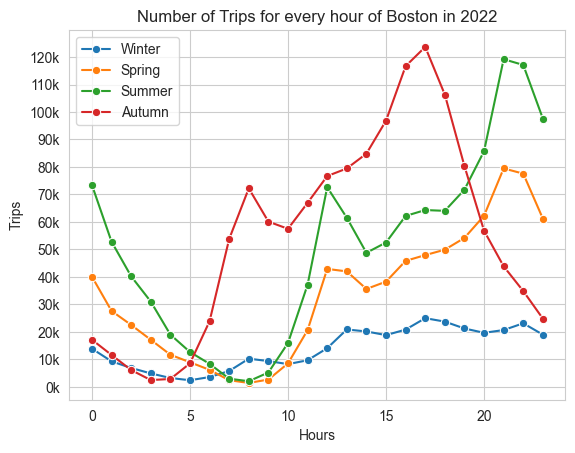

In [19]:
city = 'Boston'
year = '2022'

city_path = os.path.join(data_dir, city)
year_path = os.path.join(city_path, year)
compare_trip_for_hour(year_path, city, year)

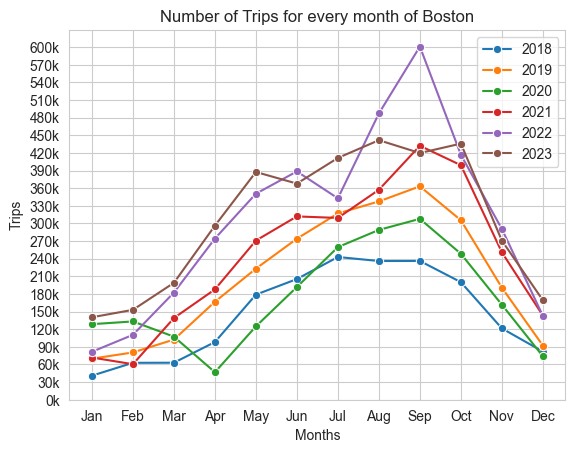

[140340,
 152975,
 199003,
 296291,
 387593,
 367839,
 411509,
 441706,
 419874,
 435867,
 270816,
 169380]

In [24]:
compare_trip_for_month(city_path, city)